In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [73]:
hiv_original = pd.read_csv('data/df_main.csv', index_col=0).dropna()

hiv = hiv_original.copy()
hiv.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [93]:
hiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 3139
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county_code        2937 non-null   int64  
 1   COUNTY             2937 non-null   object 
 2   STATEABBREVIATION  2937 non-null   object 
 3   YEAR               2937 non-null   int64  
 4   AMAT_fac           2937 non-null   float64
 5   HIVdiagnoses       2937 non-null   float64
 6   HIVincidence       2937 non-null   float64
 7   HIVprevalence      2937 non-null   float64
 8   MH_fac             2937 non-null   float64
 9   Med_AMAT_fac       2937 non-null   float64
 10  Med_MH_fac         2937 non-null   float64
 11  Med_SA_fac         2937 non-null   float64
 12  Med_SMAT_fac       2937 non-null   float64
 13  Med_TMAT_fac       2937 non-null   float64
 14  PLHIV              2937 non-null   float64
 15  Population         2937 non-null   float64
 16  SA_fac             2937 

In [94]:
hiv['mme_percap'].describe()

count    2937.000000
mean      708.460266
std       458.797282
min         0.000000
25%       404.500000
50%       650.100000
75%       931.000000
max      4086.900000
Name: mme_percap, dtype: float64

In [95]:
hiv.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income'],
      dtype='object')

In [96]:
X = hiv[['AMAT_fac', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'unemployment_rate','%msm12month', '%msm5yr', 'poverty_rate',
       'household_income']]

y = hiv[['HIVincidence']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 3005 to 2122
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AMAT_fac           2202 non-null   float64
 1   MH_fac             2202 non-null   float64
 2   Med_AMAT_fac       2202 non-null   float64
 3   Med_MH_fac         2202 non-null   float64
 4   Med_SA_fac         2202 non-null   float64
 5   Med_SMAT_fac       2202 non-null   float64
 6   Med_TMAT_fac       2202 non-null   float64
 7   PLHIV              2202 non-null   float64
 8   Population         2202 non-null   float64
 9   SA_fac             2202 non-null   float64
 10  SMAT_fac           2202 non-null   float64
 11  TMAT_fac           2202 non-null   float64
 12  drugdeathrate      2202 non-null   float64
 13  drugdeathrate_est  2202 non-null   float64
 14  drugdeaths         2202 non-null   float64
 15  mme_percap         2202 non-null   float64
 16  partD30dayrxrate   22

In [103]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
yhat = model.predict(X_test)
# yhat
mse = mean_squared_error(y_test, yhat)
mse

860.7507636506638

In [105]:
rmse = np.sqrt(mse)
rmse

29.33855421882039

In [121]:
#plt.scatter(yhat, y_test - yhat)
y_test[(y_test - yhat > 700).values.flatten()]

,HIVincidence
767,771.4


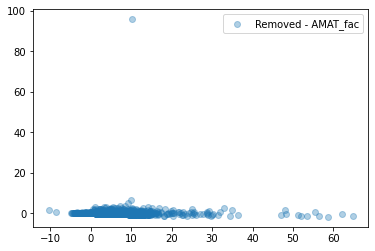

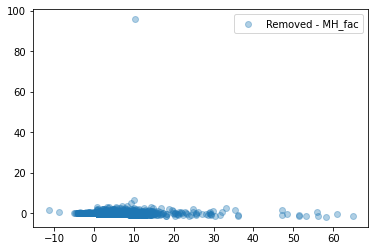

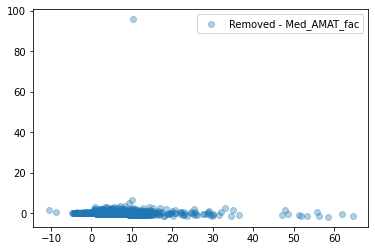

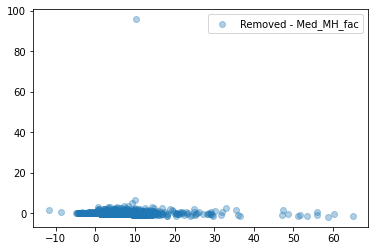

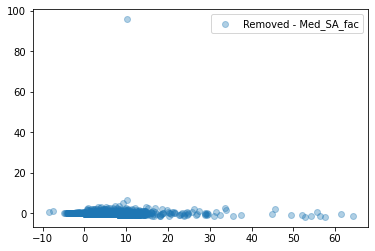

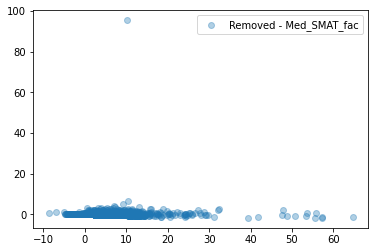

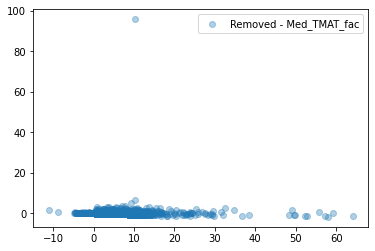

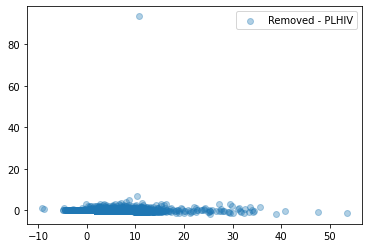

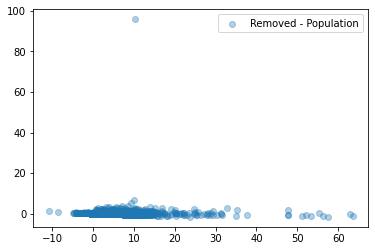

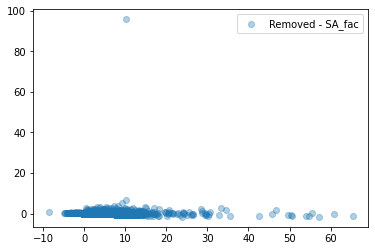

KeyboardInterrupt: 

In [107]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

def plot_model(X, y, label='Residual Plot'):
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()



all_columns = X.columns
for col_name in all_columns:
    all_columns_copy = list(all_columns)
    all_columns_copy.remove(col_name)
    plot_model(X[all_columns_copy], y, 'Removed - ' + str(col_name))


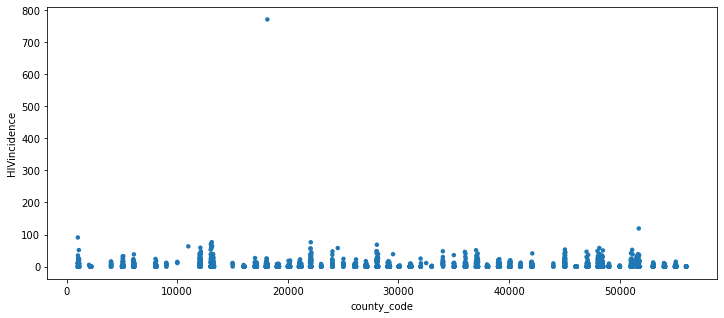

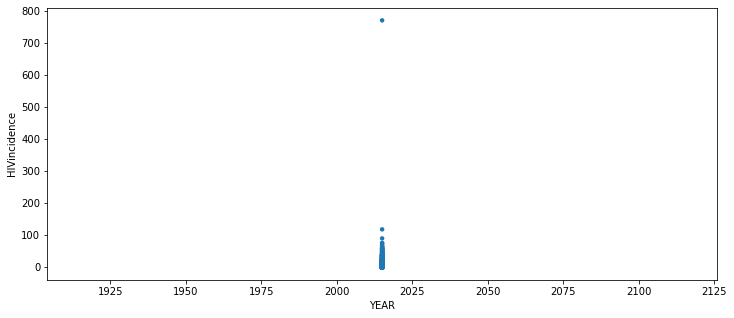

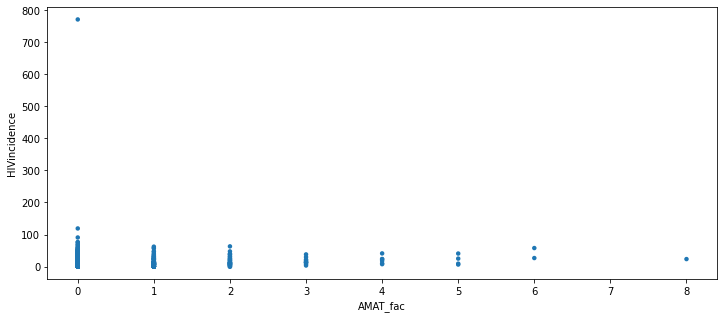

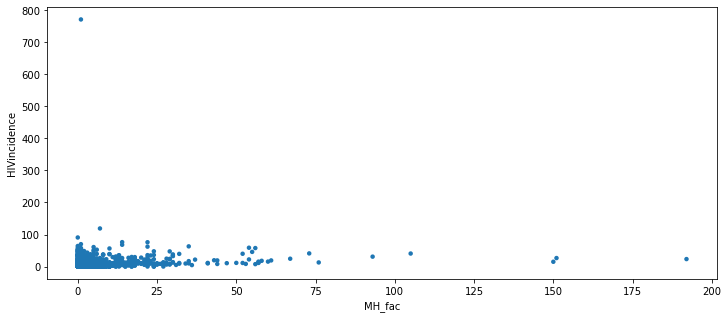

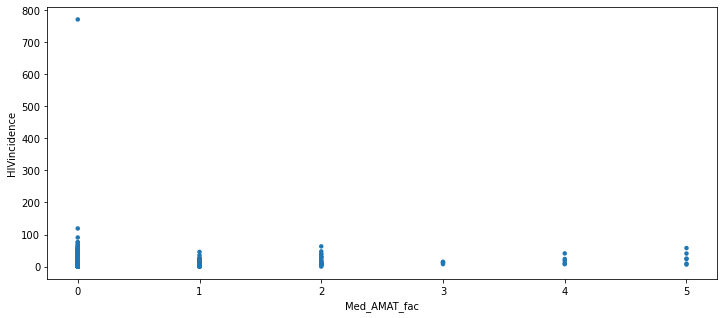

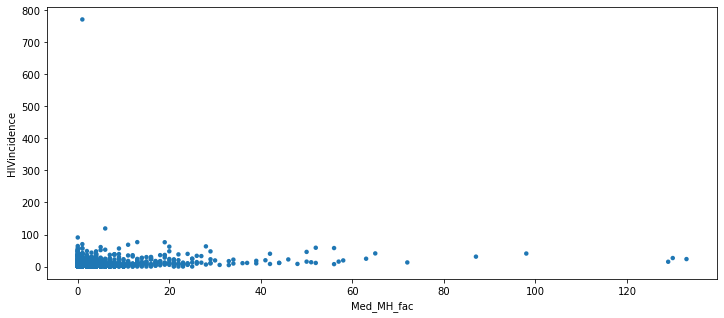

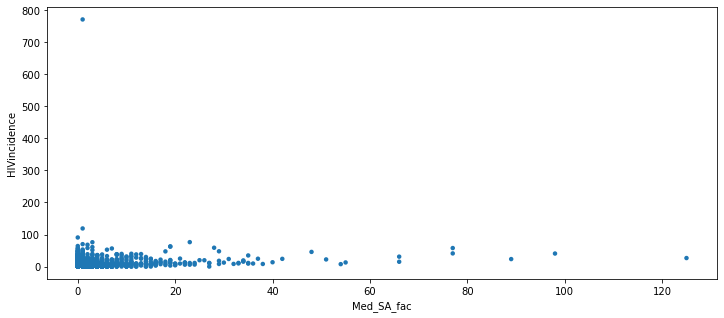

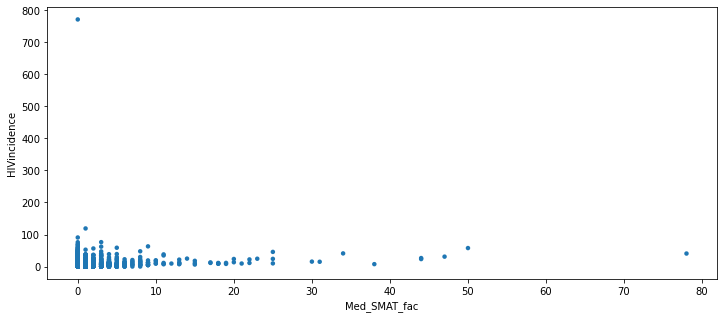

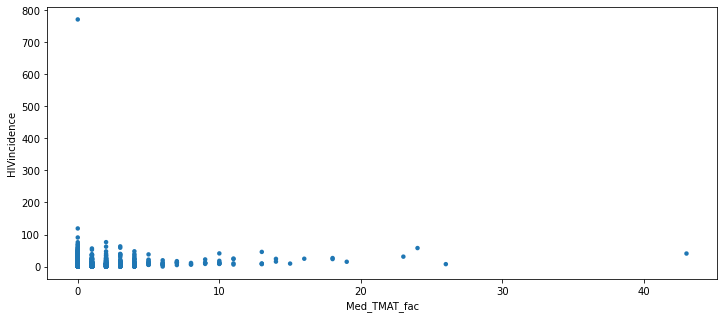

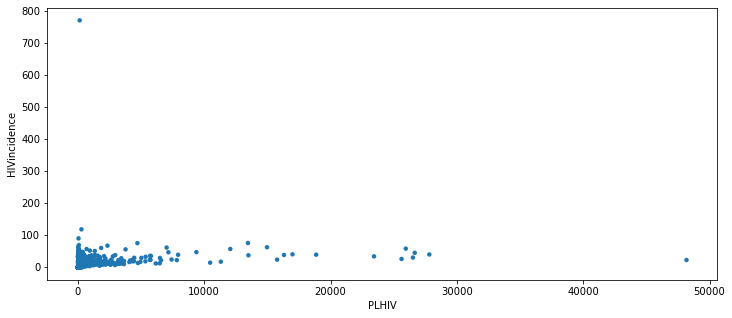

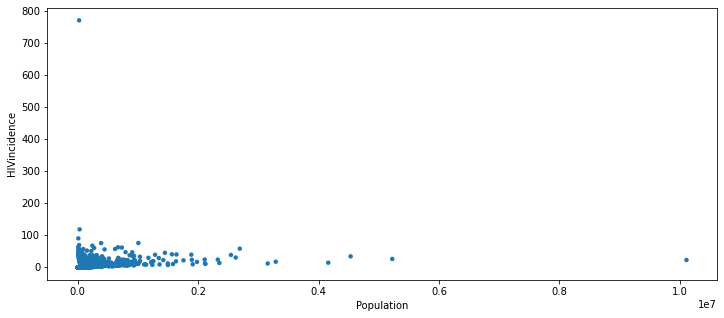

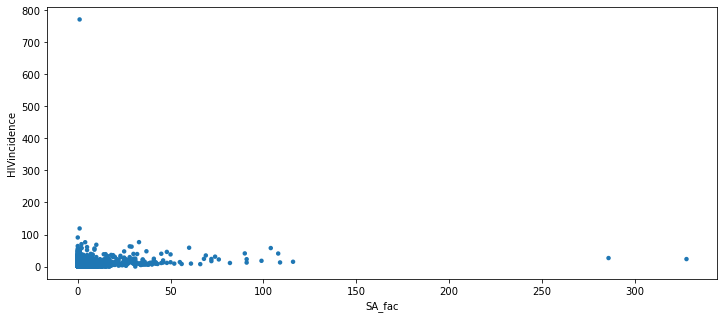

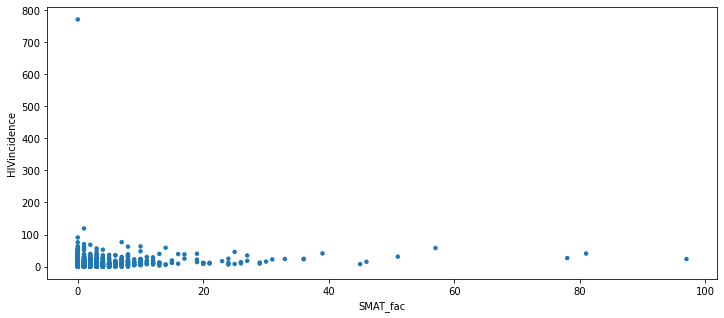

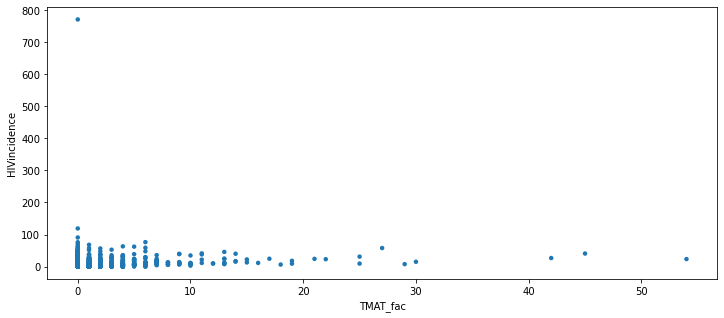

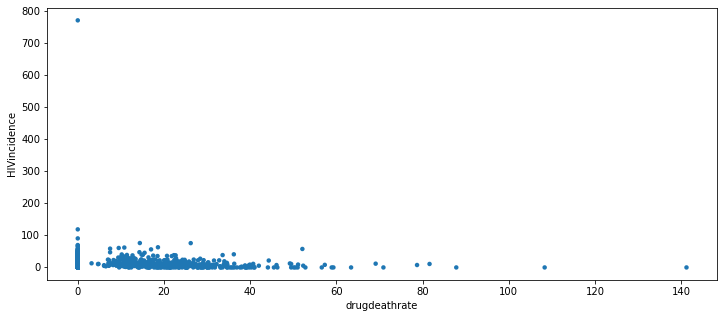

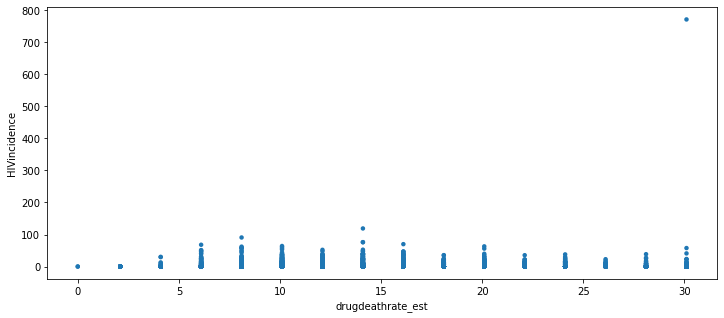

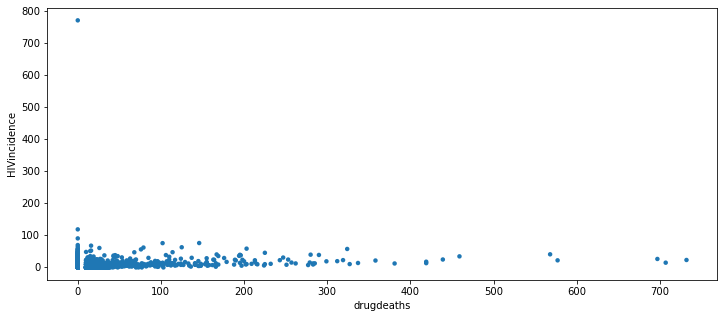

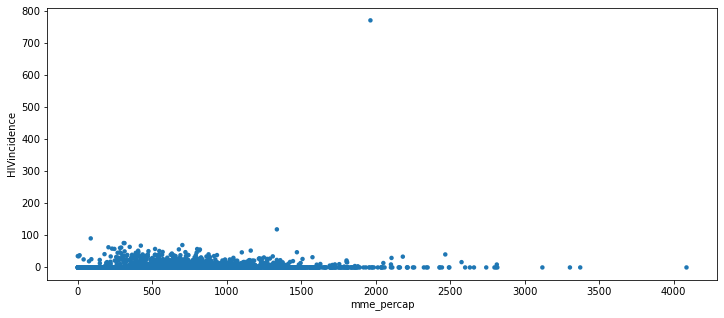

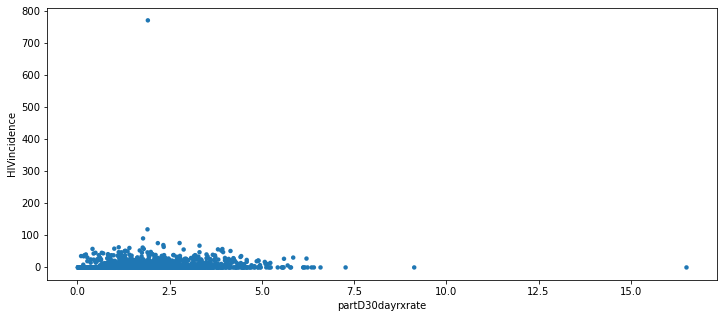

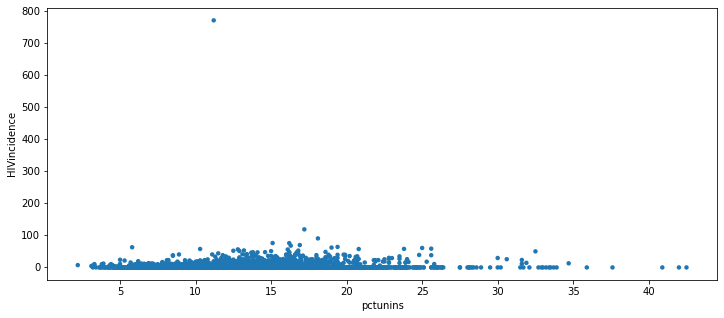

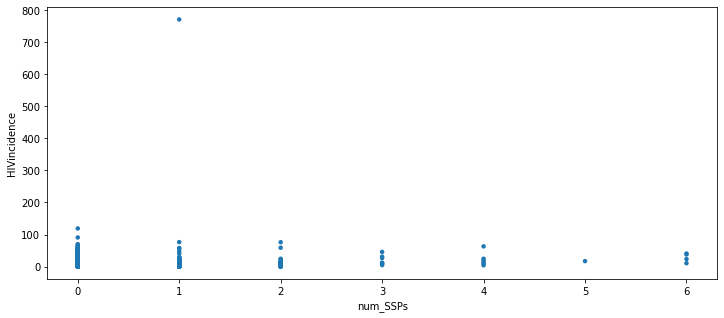

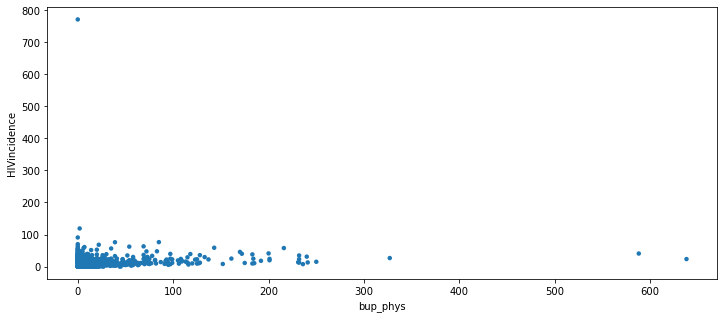

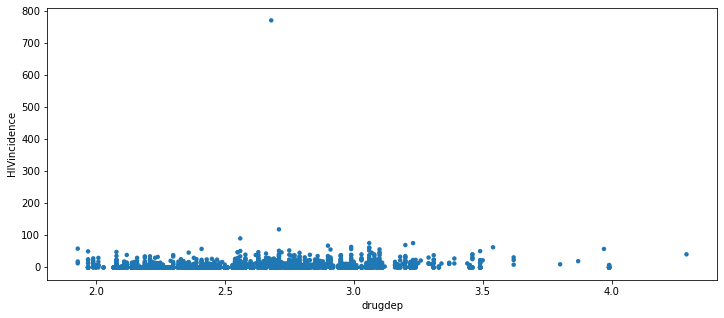

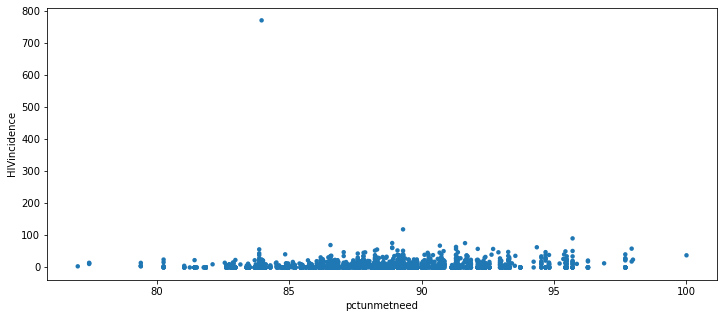

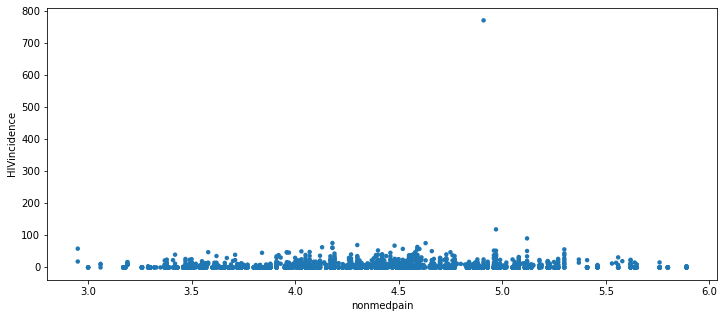

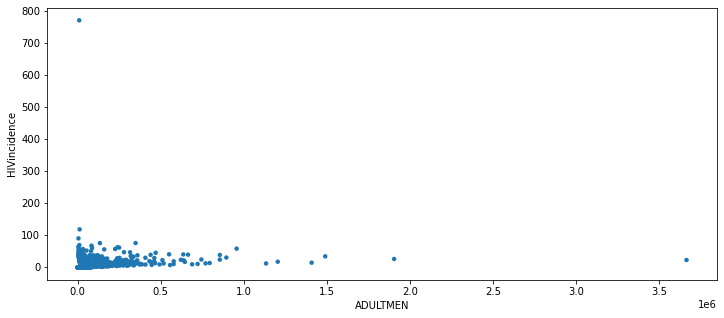

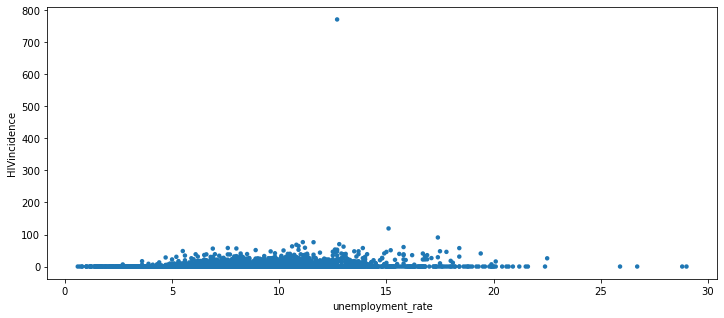

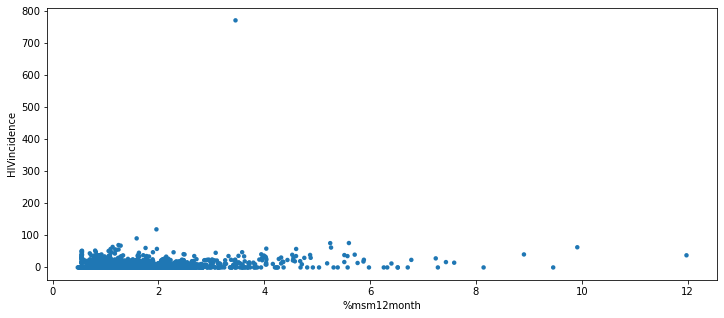

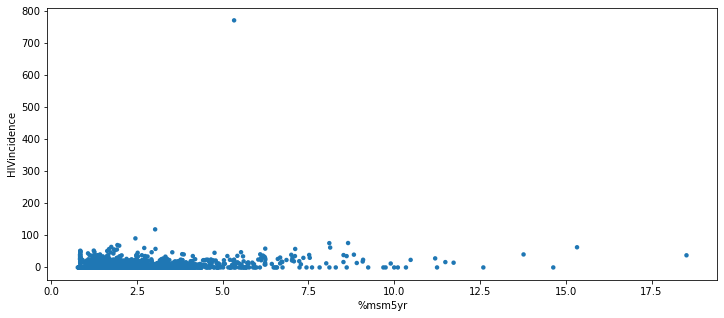

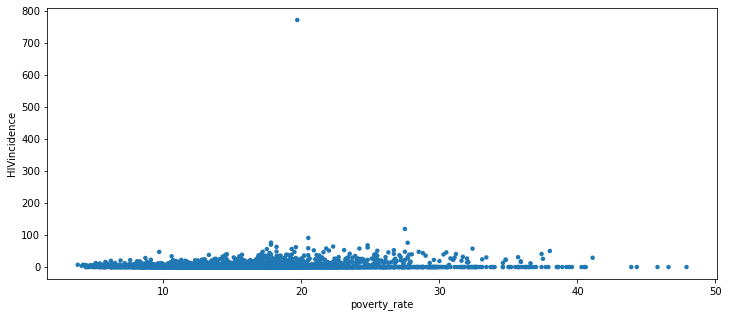

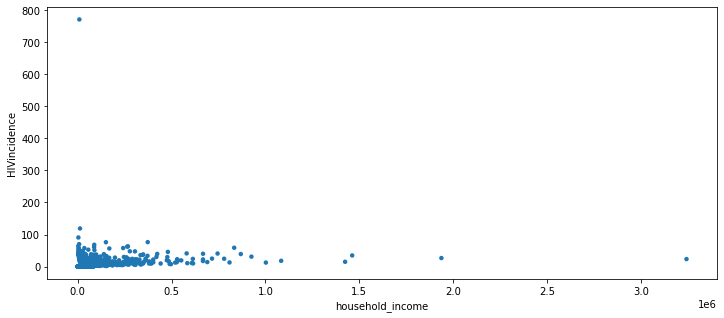

In [70]:
for col in all_columns:
    hiv.plot(kind='scatter', y='HIVincidence', x=col, edgecolor='none', figsize=(12, 5))
    plt.xlabel(col)
    plt.ylabel('HIVincidence')
    plt.show()

In [72]:
summary_model(X, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.21
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           3.19e-50
Time:                        10:46:35   Log-Likelihood:                -12345.
No. Observations:                2937   AIC:                         2.475e+04
Df Residuals:                    2906   BIC:                         2.494e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
county_code         -2.6e-08    2.1e-05     -0.001      0.999   -4.12e-05    4.12e-05
YEAR                 -0.0076      0.005     -1.565      0.118      -0.017       0.002
AMAT_fac              0.6658      2.009      0.331      0.740      -3.273       4.604
MH_fac               -0.1634      0.406     -0.403      0.687      -0.959       0.632
Med_AMAT_fac         -0.7143      2.259     -0.316      0.752      -5.143       3.714
Med_MH_fac            0.2308      0.443      0.521      0.603      -0.638       1.100
Med_SA_fac            0.2936      0.251      1.172      0.241      -0.198       0.785
Med_SMAT_fac         -2.1617      0.771     -2.802      0.005      -3.674      -0.649
Med_TMAT_fac          1.4397      1.125      1.280      0.201      -0.766       3.646
PLHIV                 0.0021      0.000      5.488      0.000       0.001       0.003
Population         7.346e-06   2.69e-05      0.274      0.784   -4.53e-05       6e-05
SA_fac               -0.2294      0.144     -1.595      0.111      -0.512       0.053
SMAT_fac              1.3218      0.649      2.037      0.042       0.050       2.594
TMAT_fac             -0.9828      0.889     -1.105      0.269      -2.726       0.761
drugdeathrate         0.0624      0.038      1.633      0.103      -0.013       0.137
drugdeathrate_est    -0.2146      0.056     -3.862      0.000      -0.323      -0.106
drugdeaths            0.0243      0.019      1.264      0.206      -0.013       0.062
mme_percap            0.0008      0.001      0.983      0.326      -0.001       0.002
partD30dayrxrate      0.9902      0.339      2.919      0.004       0.325       1.655
pctunins              0.1215      0.077      1.581      0.114      -0.029       0.272
num_SSPs              1.4497      0.908      1.597      0.110      -0.331       3.230
bup_phys             -0.0044      0.036     -0.123      0.902      -0.075       0.066
drugdep               2.1992      1.085      2.028      0.043       0.072       4.326
pctunmetneed          0.0504      0.103      0.487      0.626      -0.152       0.253
nonmedpain            0.1495      0.638      0.235      0.815      -1.101       1.400
ADULTMEN          -8.188e-05   7.94e-05     -1.031      0.303      -0.000    7.38e-05
unemployment_rate     0.4234      0.120      3.541      0.000       0.189       0.658
%msm12month          21.6334     33.771      0.641      0.522     -44.584      87.851
%msm5yr             -12.6056     21.846     -0.577      0.564     -55.441      30.230
poverty_rate          0.0545      0.072      0.762      0.446      -0.086       0.195
household_income   5.103e-05   4.67e-05      1.094      0.274   -4.05e-05       0.000
==============================================================================
Omnibus:                     8266.096   Durbin-Watson:                   1.966
P

In [92]:
X_new = X.copy()
standard = StandardScaler()
#standard.fit(X_)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 3139
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HIVincidence  2937 non-null   float64
dtypes: float64(1)
memory usage: 45.9 KB


In [81]:
summary_model(X_new, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.21
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           3.19e-50
Time:                        11:14:28   Log-Likelihood:                -12345.
No. Observations:                2937   AIC:                         2.475e+04
Df Residuals:                    2906   BIC:                         2.494e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
county_code         -2.6e-08    2.1e-05     -0.001      0.999   -4.12e-05    4.12e-05
YEAR                 -0.0076      0.005     -1.565      0.118      -0.017       0.002
AMAT_fac              0.6658      2.009      0.331      0.740      -3.273       4.604
MH_fac               -0.1634      0.406     -0.403      0.687      -0.959       0.632
Med_AMAT_fac         -0.7143      2.259     -0.316      0.752      -5.143       3.714
Med_MH_fac            0.2308      0.443      0.521      0.603      -0.638       1.100
Med_SA_fac            0.2936      0.251      1.172      0.241      -0.198       0.785
Med_SMAT_fac         -2.1617      0.771     -2.802      0.005      -3.674      -0.649
Med_TMAT_fac          1.4397      1.125      1.280      0.201      -0.766       3.646
PLHIV                 0.0021      0.000      5.488      0.000       0.001       0.003
Population         7.346e-06   2.69e-05      0.274      0.784   -4.53e-05       6e-05
SA_fac               -0.2294      0.144     -1.595      0.111      -0.512       0.053
SMAT_fac              1.3218      0.649      2.037      0.042       0.050       2.594
TMAT_fac             -0.9828      0.889     -1.105      0.269      -2.726       0.761
drugdeathrate         0.0624      0.038      1.633      0.103      -0.013       0.137
drugdeathrate_est    -0.2146      0.056     -3.862      0.000      -0.323      -0.106
drugdeaths            0.0243      0.019      1.264      0.206      -0.013       0.062
mme_percap            0.0008      0.001      0.983      0.326      -0.001       0.002
partD30dayrxrate      0.9902      0.339      2.919      0.004       0.325       1.655
pctunins              0.1215      0.077      1.581      0.114      -0.029       0.272
num_SSPs              1.4497      0.908      1.597      0.110      -0.331       3.230
bup_phys             -0.0044      0.036     -0.123      0.902      -0.075       0.066
drugdep               2.1992      1.085      2.028      0.043       0.072       4.326
pctunmetneed          0.0504      0.103      0.487      0.626      -0.152       0.253
nonmedpain            0.1495      0.638      0.235      0.815      -1.101       1.400
ADULTMEN          -8.188e-05   7.94e-05     -1.031      0.303      -0.000    7.38e-05
unemployment_rate     0.4234      0.120      3.541      0.000       0.189       0.658
%msm12month          21.6334     33.771      0.641      0.522     -44.584      87.851
%msm5yr             -12.6056     21.846     -0.577      0.564     -55.441      30.230
poverty_rate          0.0545      0.072      0.762      0.446      -0.086       0.195
household_income   5.103e-05   4.67e-05      1.094      0.274   -4.05e-05       0.000
==============================================================================
Omnibus:                     8266.096   Durbin-Watson:                   1.966
P